In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

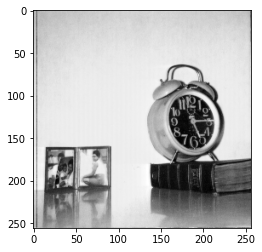

In [58]:
img = cv2.imread('../../images/clock.tiff', 0)
plt.imshow(img, cmap='gray');

# Motion Blur

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0.1 0.1 0.  0.1 0.1]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


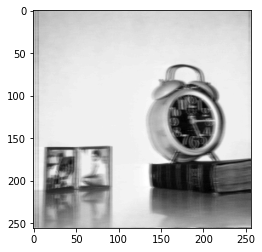

In [100]:
# implement motion blur
def motion_blur_kernel(image, kernel_size, L, angle=45):
    kernel = np.zeros((kernel_size, kernel_size))
    centre = kernel_size // 2
    angle = np.round(np.deg2rad(angle))
    
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            x = i - centre
            y = j - centre

            if y == 0:
                y = 1
                continue
            if x**2 + y**2 <= L/2 and x/y == -int(np.tan(angle)):
                # print('lmao')
                kernel[i, j] = 1/L
            else:
                kernel[i, j] = 0    
    return kernel


kernel = motion_blur_kernel(img, 5, 10, 160)
for _ in kernel:
    print(_)

motion_blurred = cv2.filter2D(img, -1, kernel)
plt.imshow(motion_blurred, cmap='gray');
plt.imsave('motion_blurred.png', motion_blurred, cmap='gray')